<a href="https://colab.research.google.com/github/Gayu2521/Air-Qualirty/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Myproject.csv",encoding='ISO-8859-1')
print(df)

Saving Myproject.csv to Myproject (1).csv
              Timestamp  PM2.5   PM10  Temperature  Humidity  Wind Speed (m/s)
0   2025-05-01 00:00:00   45.6   78.2         30.1      65.4               2.5
1   2025-05-01 01:00:00   48.1   81.5         29.8      67.1               2.1
2   2025-05-01 02:00:00   42.3   75.9         29.5      68.3               1.8
3   2025-05-01 03:00:00   39.7   72.1         29.2      69.5               1.5
4   2025-05-01 04:00:00   41.2   74.8         28.9      70.2               1.7
5   2025-05-01 05:00:00   46.5   79.3         28.7      71.0               2.0
6   2025-05-01 06:00:00   52.0   85.6         28.5      71.8               2.3
7   2025-05-01 07:00:00   58.3   92.1         28.8      70.5               2.8
8   2025-05-01 08:00:00   65.7  101.2         29.3      68.9               3.1
9   2025-05-01 09:00:00   72.9  110.5         29.9      67.5               3.5
10  2025-05-01 10:00:00   78.4  118.9         30.5      66.2               3.8
11  2025-0

Data Processing

In [ ]:
data = pd.read_csv('Myproject.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)
#Handle missing values
data.fillna(data.mean(), inplace=True)

Feature Engineering

In [ ]:
data['Hour'] = data.index.hour
data['DayOfWeek'] = data.index.dayofweek


Define features (X) and target (y)

In [ ]:
X = data[['PM10', 'Temperature', 'Humidity', 'Wind Speed (m/s)', 'Hour', 'DayOfWeek']]
y = data['PM2.5']
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Choose and train a machine learning model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
#Make predictions on the test set
y_pred = model.predict(X_test)
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.3767969673886986


Visualize the results

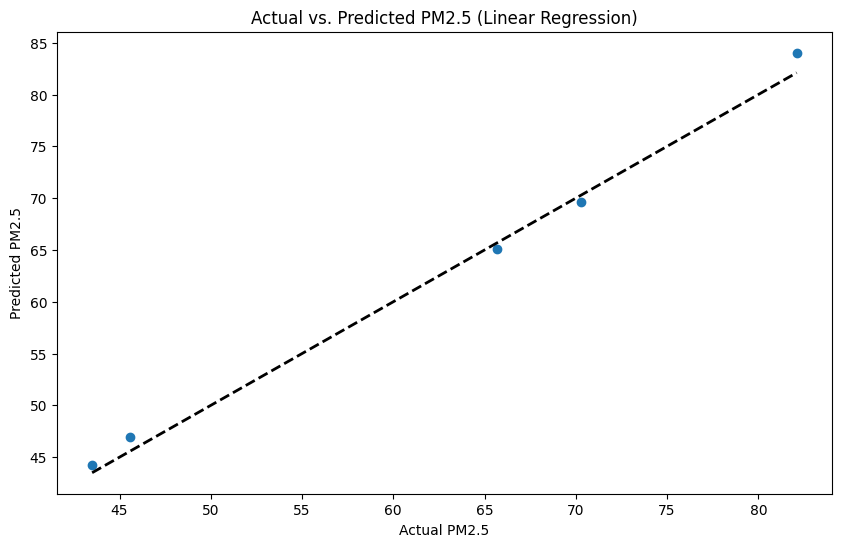

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect prediction
plt.show()

Making future predictions

In [ ]:
last_data = data.iloc[[-1]] # Get the last row
next_timestamp = data.index[-1] + pd.Timedelta(hours=1)
next_features = pd.DataFrame({
    'PM10': [last_data['PM10'].values[0]],
    'Temperature': [last_data['Temperature'].values[0]],
    'Humidity': [last_data['Humidity'].values[0]],
    'Wind Speed (m/s)': [last_data['Wind Speed (m/s)'].values[0]],
    'Hour': [next_timestamp.hour],
    'DayOfWeek': [next_timestamp.dayofweek]
}, index=[next_timestamp])

predicted_pm25_next_hour = model.predict(next_features)
print(f'Predicted PM2.5 for {next_timestamp}: {predicted_pm25_next_hour[0]:.2f}')

Predicted PM2.5 for 2025-05-02 01:00:00: 47.28
